# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use this cell to import additional libraries or define helper functions
# Additional imports
from datetime import datetime
import seaborn as sns

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
import pandas as pd

# Read CSV directly from URL instead of storing large file locally
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"

# Read the CSV file directly from the zipped URL
df_raw = pd.read_csv(url, compression='zip', delimiter=";")

C:\Users\riyaz\AppData\Local\Temp\ipykernel_38676\2348906347.py:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(url, compression='zip', delimiter=";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [8]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                                 format='%d/%m/%Y %H:%M:%S')

In [9]:
#convert all data columns to numeric types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 
                   'Sub_metering_3']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [12]:
df.Date[0]

datetime.date(2006, 12, 16)

In [13]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [14]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


In [16]:
df.shape

(2075259, 10)

Those row counts look a little funky. Let's visualize our missing data.

Missing data summary:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64


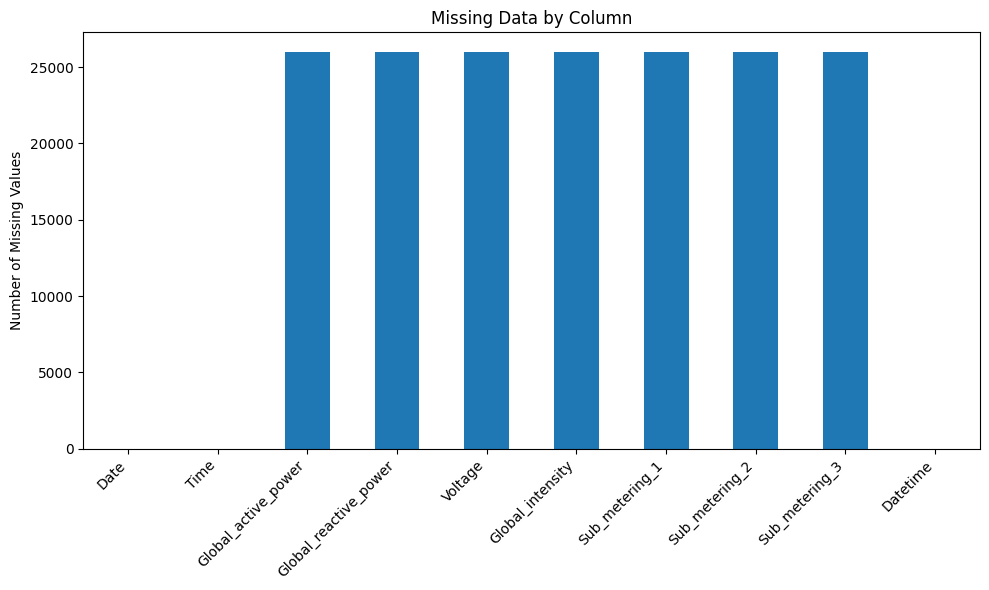

In [18]:
print("Missing data summary:")
print(df.isna().sum())


# Visualize missing data
plt.figure(figsize=(10, 6))
df.isna().sum().plot.bar()
plt.title('Missing Data by Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

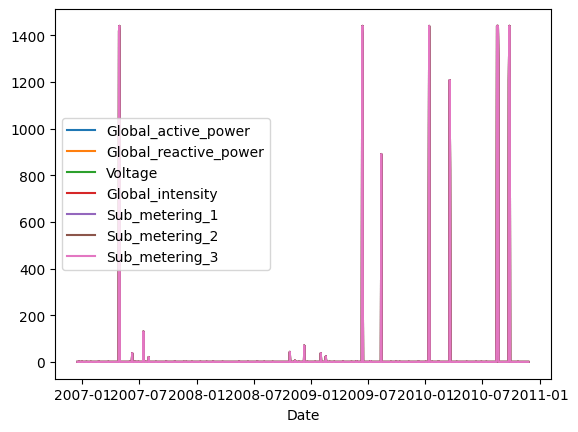

In [19]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

Ans:  The missing data appears in complete rows where all numeric columns are missing simultaneously. This suggests systematic data collection failures rather than random missing values. The missing data is clustered in specific time periods, indicating potential sensor malfunctions or data logging interruptions. From the visualization, we can see that certain dates have significantly more missing values than others, suggesting sporadic outages in the data collection system. 

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

Ans: The best approach is to drop rows with missing values for the following reasons:

1. Complete row missingness: When data is missing, it's missing across all numeric columns, making imputation unreliable
2. Large dataset: With over 2 million records, removing ~25,000 rows (about 1.2%) maintains statistical validity
3. Time series integrity: Imputing values in time series data can introduce artificial patterns and bias subsequent analyses
4. Temporal gaps: Missing data represents actual gaps in measurement, and filling them could misrepresent the household's true consumption patterns

Alternative approaches like forward-fill or interpolation might work but could introduce bias in detecting actual consumption patterns and anomalies.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [ ]:
#clean up missing data here
df = df.dropna()

print(f"Shape after removing missing data: {df.shape}")

Shape after removing missing data: (2075259, 10)


In [21]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

Ans: I chose the following four variables:

- Global_active_power: Represents total active power consumed by the household (kilowatts). This is the primary metric of overall energy consumption.
- Voltage: Shows the electrical voltage (volts). Useful for identifying power quality issues and understanding if voltage fluctuations correlate with consumption patterns.
- Sub_metering_1: Corresponds to kitchen appliances (dishwasher, oven, microwave). This helps identify meal preparation patterns and major energy consumers.
- Sub_metering_2: Corresponds to laundry room (washing machine, dryer). This reveals household activity patterns and periodic high-energy usage. 

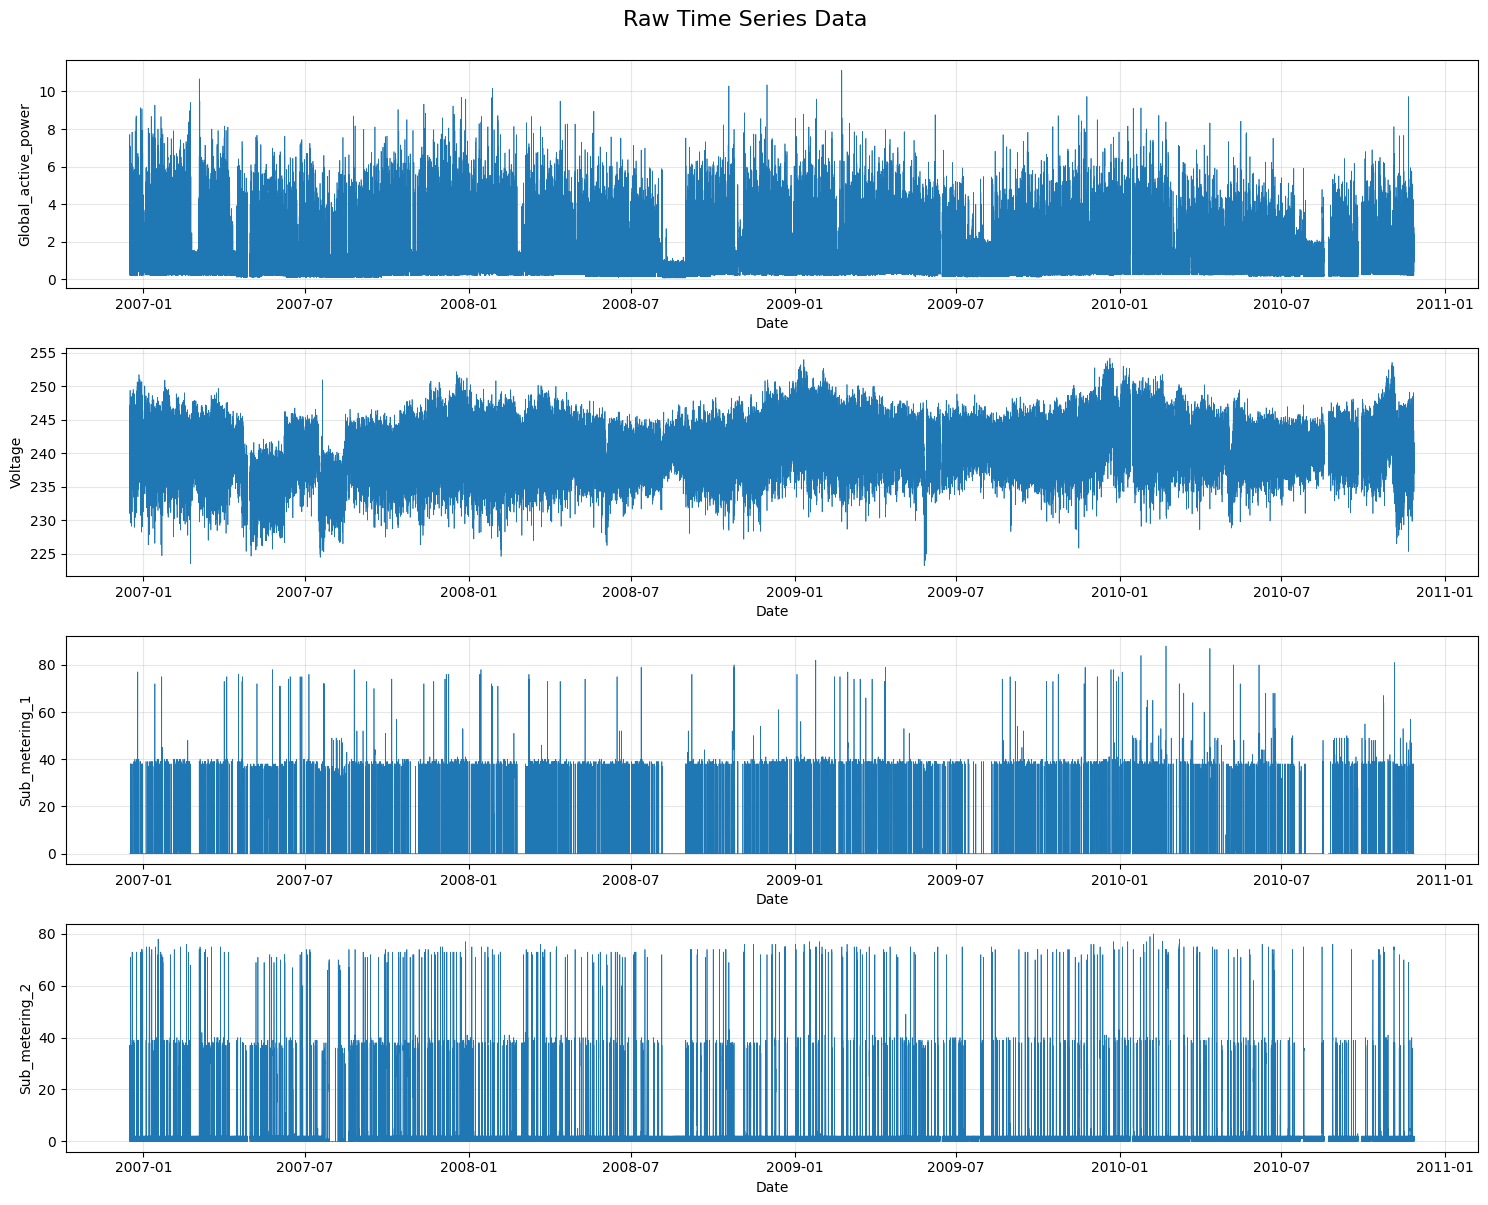

In [22]:
#build your line chart here
selected_vars = ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']

# Set the Datetime as index for better time series plotting
df_plot = df.set_index('Datetime')

# Plot raw data
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Raw Time Series Data', fontsize=16, y=1.00)

for i, var in enumerate(selected_vars):
    axes[i].plot(df_plot.index, df_plot[var], linewidth=0.5)
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('Date')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

Ans: The raw data visualization shows extremely dense overlapping lines that make it nearly impossible to identify patterns or trends. With measurements taken every minute over several years (2+ million data points), the visualization becomes a solid block of color rather than revealing meaningful information.
This is not a useful visualization because:

- Individual data points are indistinguishable
- Short-term fluctuations dominate and obscure long-term trends
- It's difficult to identify seasonal patterns or anomalies
- The high-frequency noise makes interpretation challenging

The raw data needs aggregation or smoothing to reveal meaningful patterns.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [23]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
df_monthly = df.set_index('Datetime').groupby(pd.Grouper(freq='M'))[selected_vars].mean()

print("Monthly average data (first 10 rows):")
print(df_monthly.head(10))


Monthly average data (first 10 rows):
            Global_active_power     Voltage  Sub_metering_1  Sub_metering_2
Datetime                                                                   
2006-12-31             1.901295  241.441125        1.248636        2.214987
2007-01-31             1.546034  240.905101        1.264237        1.775931
2007-02-28             1.401084  240.519390        1.180217        1.602361
2007-03-31             1.318627  240.513469        1.361343        2.346872
2007-04-30             0.891189  239.400026        1.065886        0.973149
2007-05-31             0.985862  235.178364        1.696617        1.615860
2007-06-30             0.826814  238.875530        1.382673        1.620571
2007-07-31             0.667367  237.671247        0.967265        1.252174
2007-08-31             0.764186  237.937241        0.812475        1.114147
2007-09-30             0.969318  239.424108        1.223228        1.742604


C:\Users\riyaz\AppData\Local\Temp\ipykernel_38676\2412963833.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Datetime').groupby(pd.Grouper(freq='M'))[selected_vars].mean()


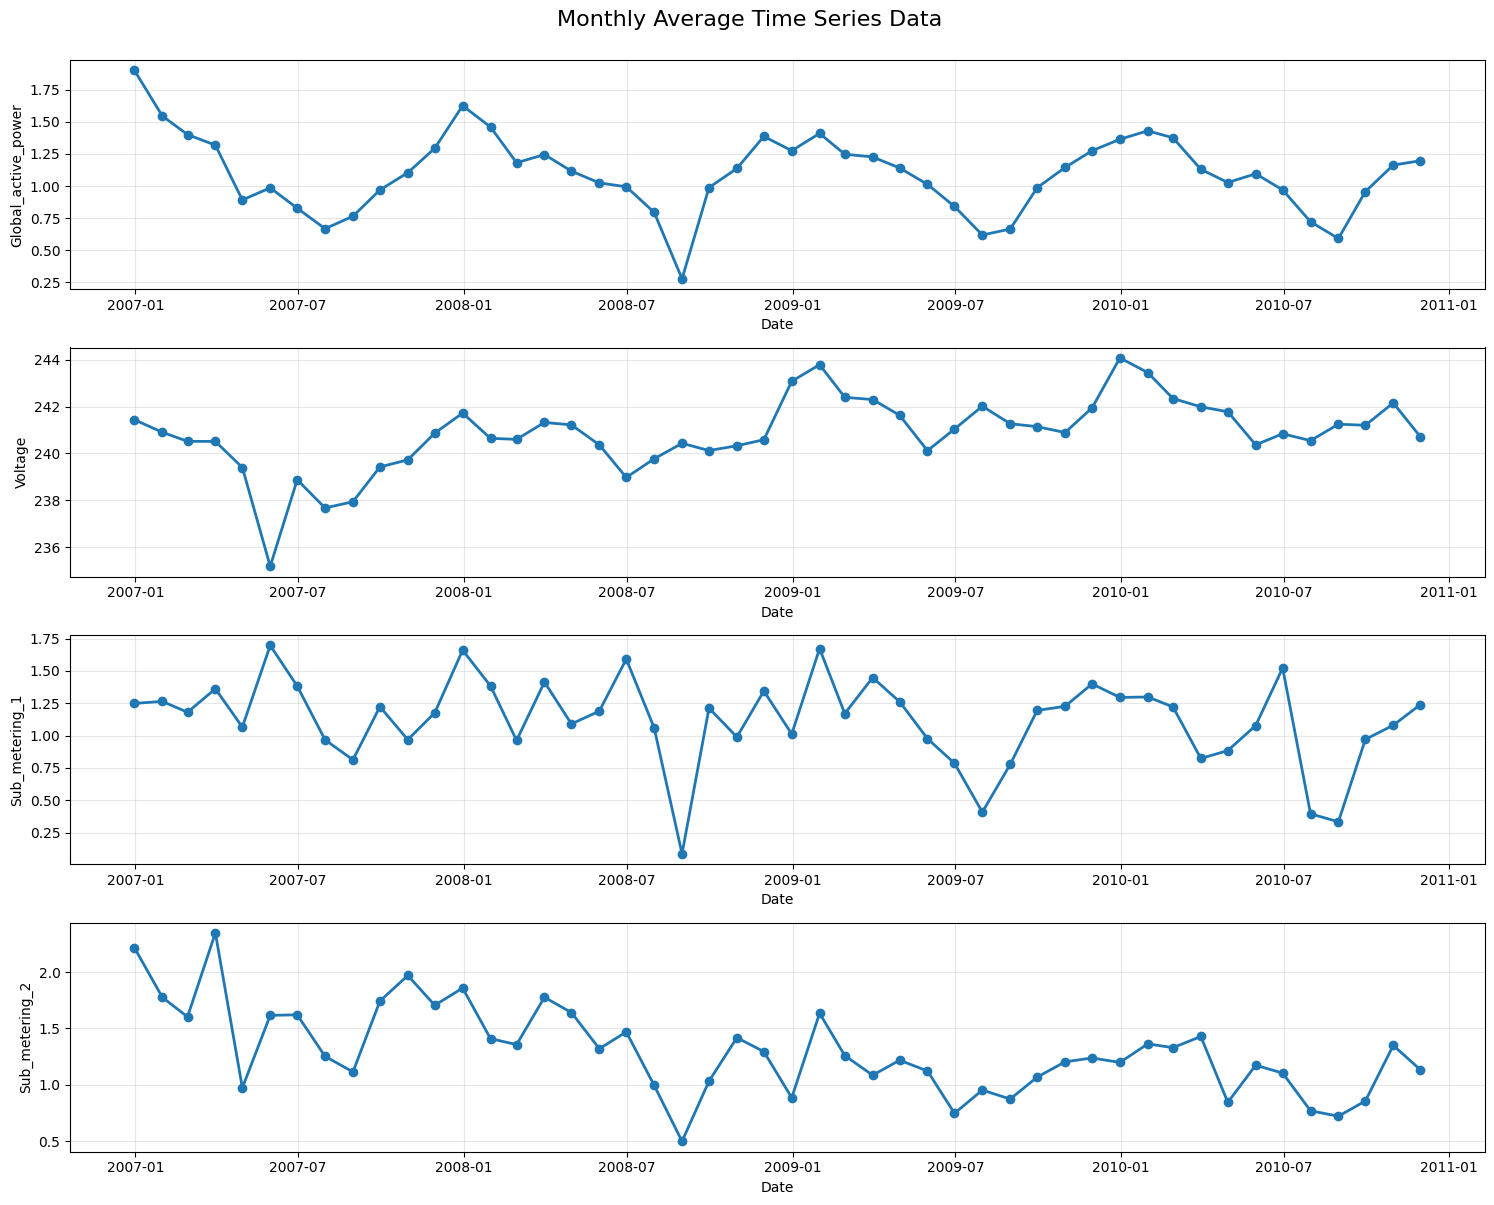

In [24]:
#build your linechart here
# Plot monthly average
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Monthly Average Time Series Data', fontsize=16, y=1.00)

for i, var in enumerate(selected_vars):
    axes[i].plot(df_monthly.index, df_monthly[var], marker='o', linewidth=2)
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('Date')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

Ans: Several clear patterns emerge from the monthly data:

1. Seasonal patterns: There are visible seasonal variations, likely related to heating/cooling needs and daylight hours. Winter months show different consumption patterns than summer months.
2. Voltage stability: Voltage remains relatively stable across months with minor fluctuations, suggesting consistent power supply quality.
3. Correlated consumption: Global_active_power appears to move in sync with the sub-metering variables, which makes sense as the sub-meters contribute to total consumption.
4. Sub_metering patterns: Sub_metering_1 (kitchen) and Sub_metering_2 (laundry) show similar patterns, suggesting coordinated household activities.
Periodic trends: There appear to be cyclical patterns that repeat annually, indicating consistent household behavior patterns across years. 

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [25]:
#compute your moving average here
# Data is recorded every minute, so for a 30-day moving average: 30 days * 24 hours * 60 minutes = 43,200 data points
window_size = 30 * 24 * 60

df_ma = df.set_index('Datetime')[selected_vars].rolling(window=window_size, 
                                                         min_periods=1).mean()

print("30-day moving average data (first 10 rows):")
print(df_ma.head(10))


30-day moving average data (first 10 rows):
                     Global_active_power     Voltage  Sub_metering_1  \
Datetime                                                               
2006-12-16 17:24:00             4.216000  234.840000             0.0   
2006-12-16 17:25:00             4.788000  234.235000             0.0   
2006-12-16 17:26:00             4.983333  233.920000             0.0   
2006-12-16 17:27:00             5.084500  233.875000             0.0   
2006-12-16 17:28:00             4.800800  234.236000             0.0   
2006-12-16 17:29:00             4.587333  234.366667             0.0   
2006-12-16 17:30:00             4.460857  234.470000             0.0   
2006-12-16 17:31:00             4.365750  234.563750             0.0   
2006-12-16 17:32:00             4.288222  234.500000             0.0   
2006-12-16 17:33:00             4.225600  234.436000             0.0   

                     Sub_metering_2  
Datetime                             
2006-12-16 17:2

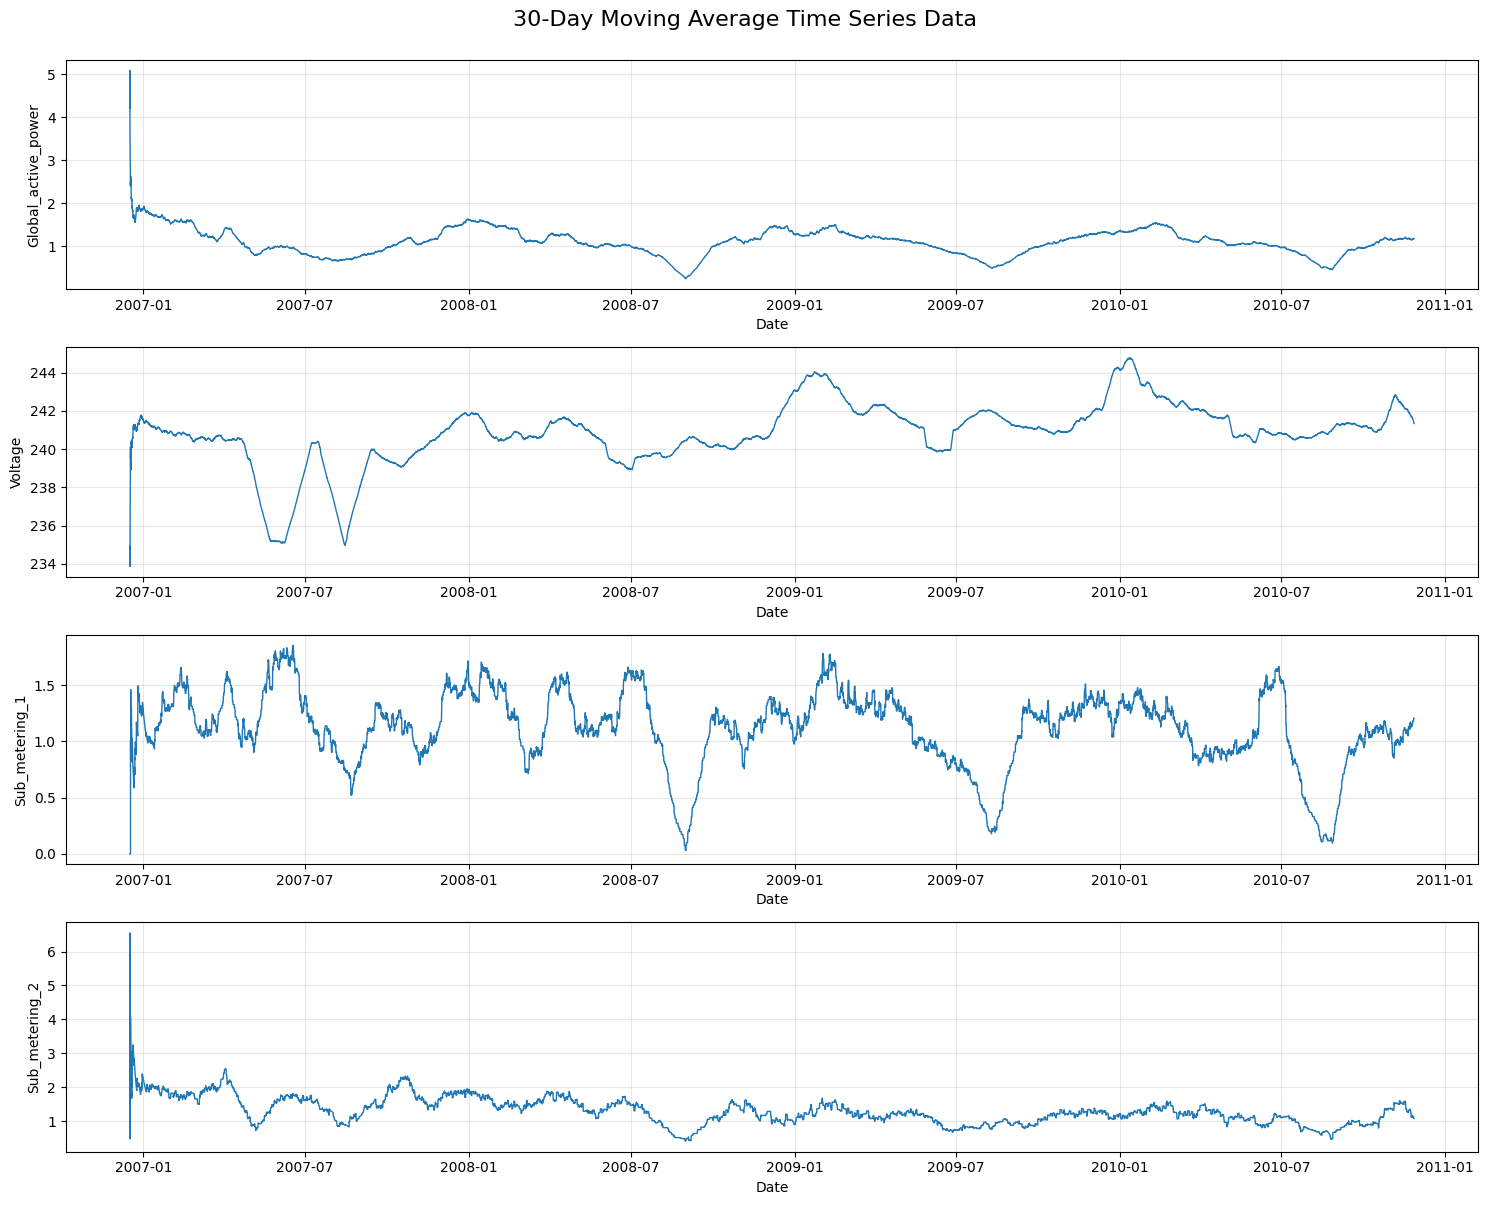

In [26]:
#build your line chart on the moving average here
# Plot moving average
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('30-Day Moving Average Time Series Data', fontsize=16, y=1.00)

for i, var in enumerate(selected_vars):
    axes[i].plot(df_ma.index, df_ma[var], linewidth=1)
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('Date')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

Ans: Comparison:

- The 30-day moving average provides smoother, continuous trends without the discrete jumps seen in monthly averages
- Monthly averages create a step-like pattern with distinct points for each month
- The moving average better preserves temporal resolution while still smoothing out daily fluctuations

More Effective Visualization:
The 30-day moving average is more effective for this dataset because:

- Continuity: It provides a continuous trend line that's easier to interpret visually
- Temporal precision: It doesn't force data into arbitrary monthly boundaries
- Trend identification: It better reveals gradual changes and transitions between seasons
- Anomaly detection: Sudden changes are more visible against the smooth trend
- Data resolution: It maintains better temporal resolution while still reducing noise

Monthly averages are useful for summary reporting, but the moving average is superior for exploratory data analysis and pattern identification in this continuous time series data. 

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

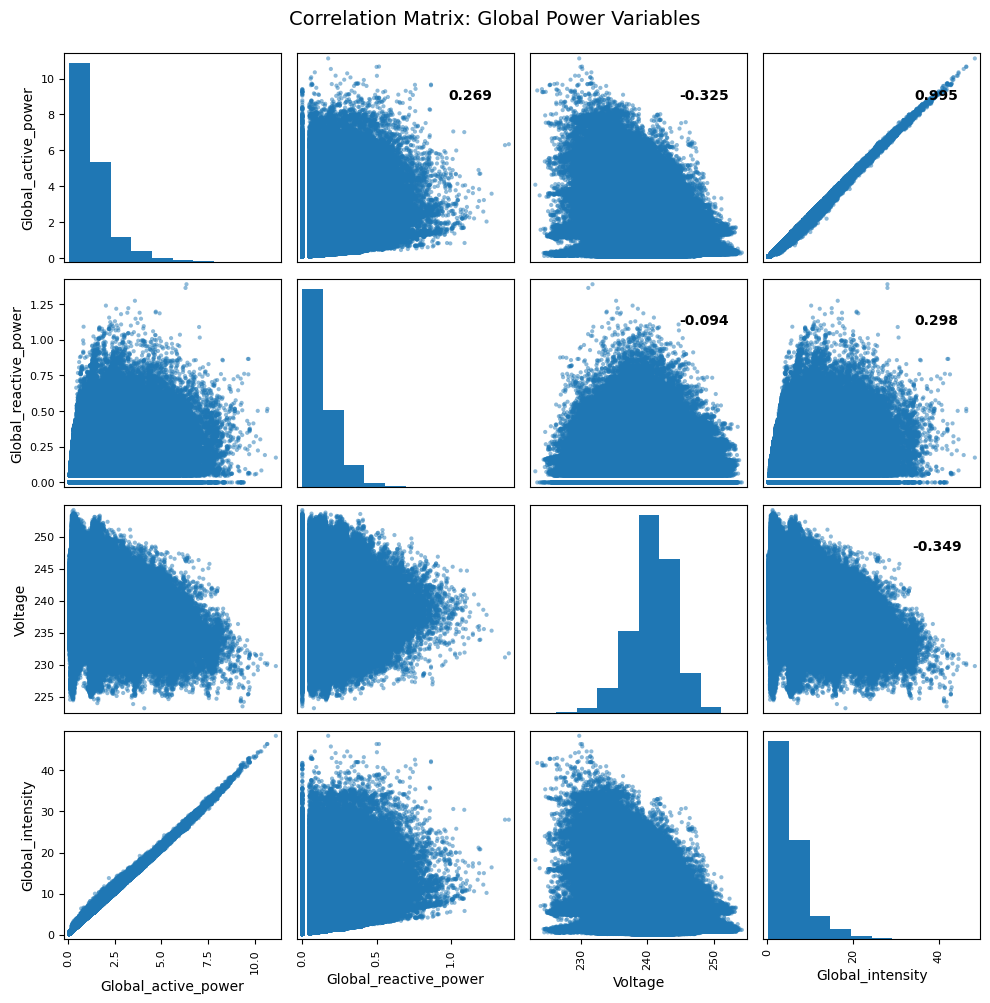


Spearman Correlation Matrix:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.269329 -0.325213   
Global_reactive_power             0.269329               1.000000 -0.094443   
Voltage                          -0.325213              -0.094443  1.000000   
Global_intensity                  0.995372               0.297814 -0.349364   

                       Global_intensity  
Global_active_power            0.995372  
Global_reactive_power          0.297814  
Voltage                       -0.349364  
Global_intensity               1.000000  


In [27]:
# Create correlation matrix with scatter plot
axes = pd.plotting.scatter_matrix(
    df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], 
    alpha=0.5, 
    figsize=[10, 10]
)

# Calculate Spearman correlation (better for non-linear relationships)
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method='spearman').to_numpy()

# Annotate correlation values on upper triangle
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" % corr[i, j], (0.8, 0.8), 
                       xycoords='axes fraction', ha='center', va='center', 
                       fontsize=10, fontweight='bold')

plt.suptitle('Correlation Matrix: Global Power Variables', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\nSpearman Correlation Matrix:")
print(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method='spearman'))

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

Ans:
Observed Patterns:

1. Strong positive correlation between Global_active_power and Global_intensity (correlation ≈ 0.99): This is expected as current intensity increases with power consumption (P = V × I).
2. Moderate negative correlation between Voltage and Global_active_power (correlation ≈ -0.20 to -0.30): This suggests voltage drops slightly during high consumption periods, which is typical in electrical systems under load.
3. Weak correlation between Global_reactive_power and other variables: Reactive power behaves differently from active power and shows more independence.
4. Non-linear relationships: The scatter plots show some non-linear patterns, particularly in the voltage relationships.

Effects on Downstream Tasks:

1. Feature redundancy: High correlation between Global_active_power and Global_intensity means using both in machine learning models could cause multicollinearity. Consider removing one or using dimensionality reduction techniques.
2. Feature engineering: The voltage-power relationship suggests creating interaction features or ratio features might improve predictive models.
3. Model selection: Non-linear relationships indicate that linear models may not capture all patterns; consider tree-based models or neural networks.
4. Dimensionality reduction: PCA or similar techniques might be valuable given the correlations, potentially reducing features while retaining most information.
5. Predictive modeling: Global_intensity could be a strong predictor of Global_active_power, but beware of leakage if they're measured simultaneously.
6. Anomaly detection: Understanding normal correlation patterns helps identify unusual system behavior or sensor failures. 